<a href="https://colab.research.google.com/github/ShiroDima/TID-TIC045/blob/main/TID_Innovation_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Neccesary libraries                                                

In [125]:
! pip install geopandas folium                                              
! pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
import matplotlib.pyplot as plt                                            
import rasterio
from datetime import datetime                                               

# Loading and Previewing Data                                               

In [127]:
transmission_substations_csv=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/all_transmission_substations.csv')
power_plants_csv=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/power_plants.csv')
transmission_lines_csv=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/transmission_lines.csv')
cluster_offgrid_csv=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/cluster_offgrid.csv')
minigrids_csv=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/minigrids (2).csv')
state_boundaries_csv=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/nigeria_state_boundaries.csv')
electrical_grid=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/electrical_grid_nigeria_15.csv')

In [128]:
transmission_substations_csv.head()

,FID,osm_id,power_substation,tags,geom
0,all_transmission_substations.3114602,564813837,substation,{},POINT (966398.5541945479 1049785.157440302)
1,all_transmission_substations.3114625,564466620,substation,{},POINT (971604.6189806585 1051695.1962917394)
2,all_transmission_substations.3117563,564468439,substation,{},POINT (987827.7545615406 1060272.2996677714)
3,all_transmission_substations.3128584,564469422,substation,{},POINT (990150.6160777707 1067457.0150056183)
4,all_transmission_substations.3130639,574213499,substation,{},POINT (986807.4233912264 1094420.3089354825)


In [129]:
power_plants_csv

,FID,description,types_of_plants,lat,long,installation_capacity_mw,geom
0,power_plants.7,Jebba Hydroelectric Power Plant,Hydro,9.135556,4.787778,570,POINT (532972.98672734 1021302.0191037019)
1,power_plants.1,AES Nigeria BARGE IPP Limited,Gas,6.559167,3.615000,270,POINT (402419.9592176844 731763.1955191164)
2,power_plants.2,Egbin Thermal Power Station,Steam,6.563056,3.615278,1320,POINT (402450.883772225 732198.9599044187)
3,power_plants.3,Olorunsogo II Power Plant - NIPP,Gas; Steam,6.885556,3.315556,720,POINT (369085.9610887856 768348.2126840537)
4,power_plants.4,Olorunsogo Power Plant,Gas,6.881944,3.314444,320,POINT (368962.2183428222 767943.2968523371)
5,power_plants.5,Omotosho Power Plant - NIPP,Gas,6.735833,4.710833,480,POINT (524407.5641679956 751562.7491455841)
6,power_plants.6,Omotosho I & II Power Station,Gas,6.735833,4.710833,304,POINT (524407.5641679956 751562.7491455841)
7,power_plants.8,Kainji Hydroelectric Power Station,Hydro,9.862500,4.613333,760,POINT (513553.91381565353 1103350.6911312963)
8,power_plants.9,Shiroro Hydroelectric Power Station,Hydro,9.975000,6.834444,600,POINT (760806.8704629388 1116064.1641375)
9,power_plants.10,Delta Power Station (Transcorp Ughelli Power S...,Gas,5.541111,5.915556,860,POINT (658516.6371512987 617797.4558860898)


In [130]:
transmission_lines_csv.head()

,FID,fid_1,geometry,fid,osm_power_line_id,osm_id,power_line,tags,offset
0,transmission_lines.1,1,"LINESTRING (3.3854091 6.471850199423217, 3.387...",1,184.0,564441300.0,line,"cables: 6, frequency: 50, voltage: 132000",6.0
1,transmission_lines.2,2,"LINESTRING (6.8533431 6.140590799437865, 6.857...",2,87.0,575700596.0,line,voltage: 330000,3.0
2,transmission_lines.3,3,"LINESTRING (6.0187912 9.147705199405225, 6.018...",3,273.0,564402808.0,line,NaN,2.0
3,transmission_lines.4,4,"LINESTRING (7.5572314 6.402926199426054, 7.557...",4,550.0,548722729.0,line,"cables: 3, voltage: 330000",6.0
4,transmission_lines.5,5,"LINESTRING (6.8601059 6.146071299437604, 6.868...",5,83.0,575700594.0,line,voltage: 330000,2.0


In [131]:
cluster_offgrid_csv.head()

,FID,fid,area_km2,building_count,large_building_count,percentage_large_building,building_area_km2,building_count_density_perkm2,percentage_building_area,grid_dist_km,geom
0,cluster_offgrid.1,1,0.372251,778,480,0.616967,0.076766,2089.987305,0.206221,22.475574,"POLYGON ((715746.3178668476 482374.8928063816,..."
1,cluster_offgrid.2,2,0.982818,1489,1053,0.707186,0.188231,1515.031494,0.191522,27.298412,"POLYGON ((699828.7385890055 478540.5299318558,..."
2,cluster_offgrid.3,3,0.436341,734,440,0.599455,0.060379,1682.171021,0.138375,33.566612,"POLYGON ((688549.1883725052 480103.690705081, ..."
3,cluster_offgrid.4,4,0.922544,1113,819,0.735849,0.144856,1206.446777,0.157018,29.344755,"POLYGON ((694458.9513761475 480324.0167405627,..."
4,cluster_offgrid.5,5,0.101582,110,95,0.863636,0.016632,1082.867676,0.163729,28.299776,POLYGON ((697093.2256070838 480397.96057361393...


In [132]:
minigrids_csv.head()

,FID,lga_name,community,lat,lon,power_system,power_kw,status,number_of_connections,fund_type,project,owner,condition,located,geom
0,minigrids.26,Arewa,Kare,12.898667,4.062016,Solar Hybrid,100.0,Existing,535.0,Equity; Grant,REA;REF,Nayo Tropical Technologies Limited,Operational,Yes,POINT (452181.55271413096 1448157.525865247)
1,minigrids.27,Kwali,Kigbe,8.681200,7.094500,Solar,20.0,Existing,NaN,Equity;Grant,Havenhill,Havenhill,Operational,Yes,POINT (789756.1274328792 970105.676503249)
2,minigrids.29,Balanga,Kolaku,10.039130,11.779307,Solar,47.0,Existing,350.0,Equity;Grant,BoI;UNDP;GVE,GVE,Operational,Yes,POINT (1311266.479401542 1123313.4044015515)
3,minigrids.30,Kaltungo,Kolwa,9.704815,11.542259,Solar,38.0,Existing,200.0,Debt; Grant,BoI;UNDP;IEEE,GVE,Operational,Yes,POINT (1284878.349956283 1085538.1687694453)
4,minigrids.31,Shendan,Kuka,8.438683,9.695346,Solar Hybrid,150.0,Under Construction,2782.0,NaN,All On; ElectriFI,GVE,Non Operational,Yes,POINT (1079281.0020484996 942804.6383047344)


In [133]:
state_boundaries_csv.head()

,FID,adm1_en,geom
0,nigeria_state_boundaries.NG001,Abia,MULTIPOLYGON (((822295.9619617525 673246.32529...
1,nigeria_state_boundaries.NG002,Adamawa,MULTIPOLYGON (((1516314.9825899764 1226236.927...
2,nigeria_state_boundaries.NG003,Akwa Ibom,MULTIPOLYGON (((928940.5678073467 513893.87396...
3,nigeria_state_boundaries.NG004,Anambra,MULTIPOLYGON (((771726.7552443956 748767.77588...
4,nigeria_state_boundaries.NG005,Bauchi,MULTIPOLYGON (((1196823.7390659382 1398273.013...


In [134]:
electrical_grid.head()

,lat,lon,Electrical Distribution Grid
0,7.520427,2.785034,1
1,6.397189,2.785034,1
2,6.724620,2.785034,1
3,6.691887,2.785034,1
4,6.429942,2.785034,1


In [135]:
electrical_grid['location']=electrical_grid.apply(lambda x: Point((x['lon'],x['lat'])),axis=1)                                                
electrical_grid.to_csv('electrical_grid.csv')

# Seperating Longitude and Latitude From String Paths                                           

In [136]:
transmission_lines=gpd.read_file('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/transmission_lines.csv',
                                 GEOM_POSSIBLE_NAMES='geometry',
                                 KEEP_GEOM_COLUMNS='NO')

power_plants=gpd.read_file('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/power_plants.csv',
                           GEOM_POSSIBLE_NAMES='geom',
                           KEEP_GEOM_COLUMNS='NO')

state_boundaries=gpd.read_file('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/nigeria_state_boundaries.csv',
                               GEOM_POSSIBLE_NAMES='geom',
                               KEEP_GEOM_COLUMNS='NO')
                    

transmission_substations=gpd.read_file('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/all_transmission_substations.csv',
                                        GEOM_POSSIBLE_NAMES='geom',
                                        KEEP_GEOM_COLUMNS='NO')

data=gpd.read_file('/content/drive/MyDrive/TID_Innovation/Data/data.geojson')

cluster_offgrid=gpd.read_file('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/cluster_offgrid.csv',
                              GEOM_POSSIBLE_NAMES='geom',
                              KEEP_GEOM_COLUMNS='NO')

minigrids=gpd.read_file('/content/drive/MyDrive/TID_Innovation/Data/TID_Dataset/minigrids (2).csv',
                        GEOM_POSSIBLE_NAMES='geom',
                        KEEP_GEOM_COLUMNS='NO')

electrical_grid=gpd.read_file('/content/electrical_grid.csv',
                              GEOM_POSSIBLE_NAMES='location',
                              KEEP_GEOM_COLUMNS='NO')

grid=gpd.read_file('/content/drive/MyDrive/TID_Innovation/Data/modelled_grid_original.csv',
                   GEOM_POSSIBLE_NAMES='geom',
                        KEEP_GEOM_COLUMNS='NO')

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.



<Axes: >

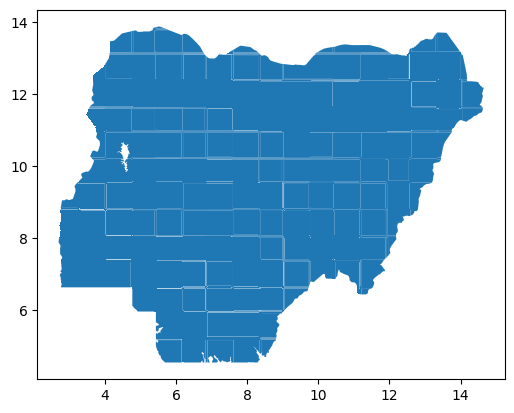

In [137]:
data=data[data.iso=='nga']
# print('Original CRS:', data.crs)                                                
data.plot()

<Axes: >

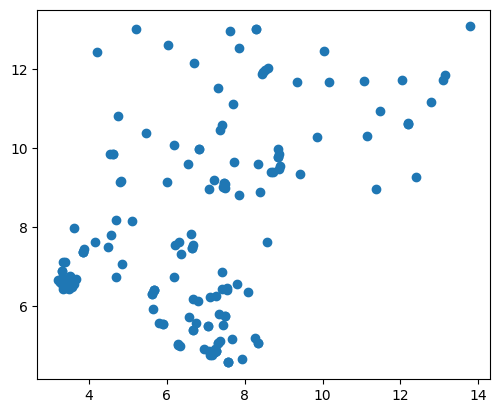

In [138]:
# print('Original CRS:', transmission_substations.crs)                                                
# print(transmission_substations.head())
transmission_substations.set_crs("EPSG:3857",inplace=True)
# print('New CRS:', transmission_substations.crs)                                                
# print(transmission_substations.head())
transmission_substations.to_crs("EPSG:4326",inplace=True)
# print(transmission_substations.head())
transmission_substations.plot()

<Axes: >

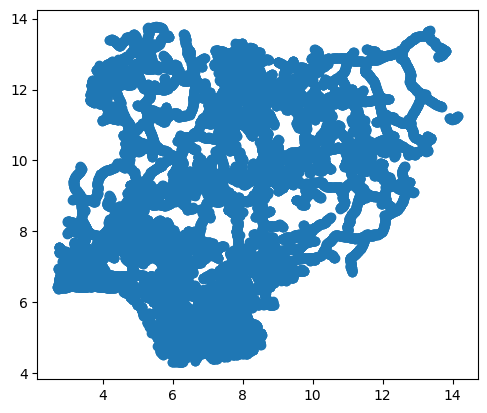

In [139]:
electrical_grid.set_crs('EPSG:4326',inplace=True)
electrical_grid.plot()

<Axes: >

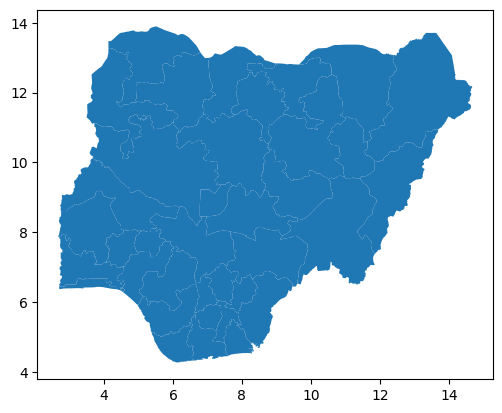

In [140]:
# print(state_boundaries.crs)
# print(state_boundaries.head())
state_boundaries.set_crs("EPSG:3857",inplace=True)
# print(state_boundaries.crs)
# print(state_boundaries.head())
state_boundaries.to_crs("EPSG:4326",inplace=True)
# print(state_boundaries.crs)
# print(state_boundaries.head())
state_boundaries.plot()

<Axes: >

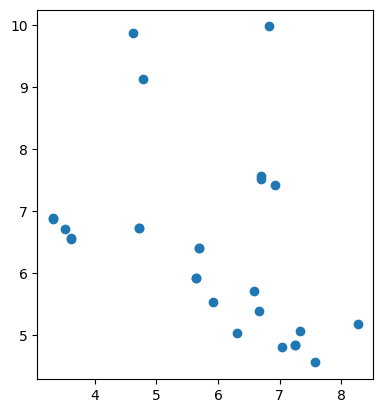

In [141]:
# print(power_plants.crs)
# print(power_plants.head())
power_plants.set_crs("EPSG:3857",inplace=True)
# print(power_plants.crs)
# print(power_plants.head())
power_plants.to_crs("EPSG:4326",inplace=True)
# print(power_plants.crs)
# print(power_plants.head())
power_plants.plot()

<Axes: >

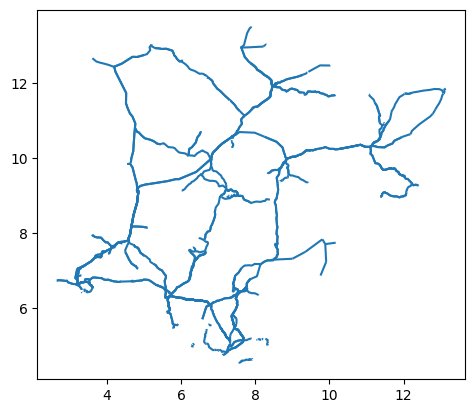

In [142]:
# print('Original CRS:', transmission_lines.crs)
transmission_lines.set_crs("EPSG:4326",inplace=True)                                                
# print('Original CRS:', transmission_lines.crs)
transmission_lines.plot()

In [ ]:
# print('Original CRS:', grid.crs)                                                
# print(grid.head())
grid.set_crs("EPSG:3857",inplace=True)
# print('New CRS:', grid.crs)                                                
# print(grid.head())
grid.to_crs("EPSG:4326",inplace=True)
# print(grid.head())
grid.plot()

<Axes: >

#  Final Map                                                

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))

state_boundaries.plot(ax=ax)
power_plants.plot(ax=ax, color='red', markersize=30,marker='D',label='Power Plants')
transmission_substations.plot(ax=ax, color='black',markersize=20,label='Transmission Substations')
grid.plot(ax=ax,label='Electricity Grid Line',linewidth=1,color='yellow')
# transmission_lines.plot(ax=ax,color='green',linewidth=0.5,label='Electricity Grid Line')
# lines=electrical_grid.plot(ax=ax,color='yellow',label='testing',linewidth=0.4)
# lines.set_linewidth(0.01)

plt.title('Electrical Connectivity Map Of Nigeria')
plt.legend()                                         
plt.grid(True, which='minor', linestyle='-', color='yellow', alpha=0.5)
plt.grid(True, which='major', linestyle='-', color='black', alpha=0.5)

In [ ]:
minigrids.plot()

# Population_Data

In [ ]:
state_lga_df=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/States&LGA/Nigeria states and population.csv')
state_lga_df=state_lga_df.iloc[0:769,0:3]
state_lga_df

In [ ]:
wards_lga_csv=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/States&LGA/Nigeria_Wards_Lat-Long.csv')
# wards_lga_csv
wards_lga_csv['location']=wards_lga_csv.apply(lambda x: Point((x['Longitude'],x['Latitude'])),axis=1)                                                
wards_lga_csv.to_csv('wards_lga_csv.csv')
wards_lga=gpd.read_file('/content/wards_lga_csv.csv',
                              GEOM_POSSIBLE_NAMES='location',
                              KEEP_GEOM_COLUMNS='NO')

In [ ]:
wards_lga_csv

In [ ]:
# fig,ax=plt.subplots(figsize=(12,12))
# state_boundaries.plot(ax=ax)
# wards_lga.plot(ax=ax,color='red')

# electricity_supply

In [ ]:
solcast_index=pd.read_csv('/content/drive/MyDrive/TID_Innovation/Data/Solcast/solcast_index.csv')

In [ ]:
linklist=['/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/0_9.218209_9.517949/9.218209_9.517949_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/1_6.914868_5.147814/6.914868_5.147814_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/2_8.499791_8.199694/8.499791_8.199694_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/3_9.326475_12.398385/9.326475_12.398385_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/4_6.264923_8.01373/6.264923_8.01373_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/5_12.122181_6.223582/12.122181_6.223582_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/6_12.228012_9.561587/12.228012_9.561587_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/7_12.379671_7.630575/12.379671_7.630575_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/8_13.053314_5.322272/13.053314_5.322272_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/9_11.4942_4.233335/11.4942_4.233335_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/10_10.363779_11.192759/10.363779_11.192759_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/11_11.884636_13.151967/11.884636_13.151967_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/12_7.999362_10.773986/7.999362_10.773986_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/13_11.74707_8.524711/11.74707_8.524711_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/14_10.501518_7.44084/10.501518_7.44084_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/15_7.336902_8.740369/7.336902_8.740369_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/16_5.572012_7.058822/5.572012_7.058822_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/17_10.776062_9.999194/10.776062_9.999194_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/18_9.930922_5.598321/9.930922_5.598321_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/19_12.293876_11.439041/12.293876_11.439041_Solcast_PT60M.csv']

In [ ]:
def get_irradiance(state,csv_path):
  state=pd.read_csv(csv_path)
  state[['date','start_time']]=state['PeriodStart'].str.split('T',expand=True)
  daily_irradiance=state.groupby('date').sum()[['Ghi','GtiFixedTilt','GtiTracking']]
  return(list(round(daily_irradiance.mean()/1000,2)))
  # avg_daily_irriadiance=list(zip(list(daily_irradiance.columns),round(daily_irradiance.mean()/1000,2)))
  # return(avg_daily_irradiance)                                                 

In [ ]:
irradiance_list=[]
for index,link in enumerate(linklist):
  state=solcast_index.loc[index,'State']
  irradiance_list.append(get_irradiance(state,link))
  # irradiance_list.append(get_irradiance(state,link))

In [ ]:
Ghi=[item[0] for item in irradiance_list]
GtiFixedTilt=[item[1] for item in irradiance_list]
GtiTracking=[item[2] for item in irradiance_list]
state=list(solcast_index.State)
df_dict={'state':state,'ghi':Ghi,'gtifixed':GtiFixedTilt,'gtitracking':GtiTracking}
avg_daily_irradiance_2022=pd.DataFrame(df_dict)
avg_daily_irradiance_2022